In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
cd /content/gdrive/My Drive/Colab Notebooks

/content/gdrive/My Drive/Colab Notebooks


In [4]:
ls

'21BAI1303_Lab 3.ipynb'   Lab1_numpy.ipynb              'Lab 6.ipynb'
 email.csv                Lab2_pandas.ipynb              music.csv
 heart.csv               'Lab 4.ipynb'                   play.csv
 houseprice1.csv         'Lab 5.ipynb'                   weight-height.csv
 Iris.csv                 Lab5_Prakhar_21BAI1326.ipynb


Q1. Design a binary classifier for classifying the following emails as spam (1) or ham (0). (Use email.csv for training.)
 • Print all the parameter values learnt after training 
 • Show the accuracy on the test set.

Learned Parameters: 
Coefficients:  [[-0.41069999  0.02264348  0.97129646  0.15852836 -1.1470797   1.18345536]]
Intercept:  [0.27399027]
Accuracy on Test Set:  0.75
Predictions:  [1 0 1 1 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


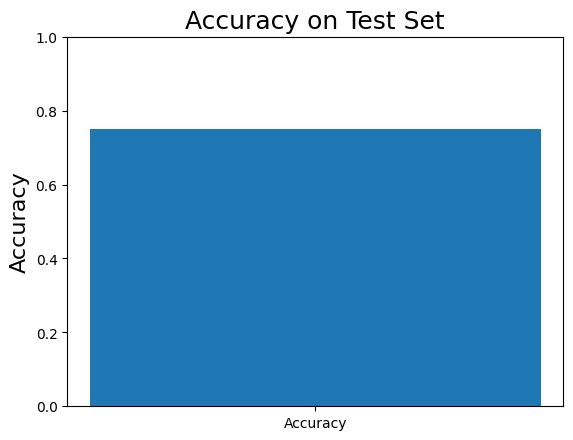

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


data = pd.read_csv('email.csv')

X_train, X_test, y_train, y_test = train_test_split(data.drop('class', axis=1), data['class'], test_size=0.2, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)

print("Learned Parameters: ")
print("Coefficients: ", clf.coef_)
print("Intercept: ", clf.intercept_)

# Evaluate accuracy on the test set
accuracy = clf.score(X_test, y_test)
print("Accuracy on Test Set: ", accuracy)

test_emails = [[0, 1, 0, 0, 0, 0], [1, 1, 1, 0, 1, 0], [0, 1, 1, 0, 0, 0], [1, 0, 1, 0, 0, 0], [0, 1, 0, 0, 1, 0], [0, 0, 0, 1, 1, 0], [0, 1, 0, 1, 1, 0], [0, 0, 0, 0, 1, 0]]
predictions = clf.predict(test_emails)
print("Predictions: ", predictions)

import matplotlib.pyplot as plt


plt.bar(['Accuracy'], [accuracy])
plt.title('Accuracy on Test Set', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([0.0, 1.0])
plt.show()

Q2. Use appropriate Scikit Library function to apply logistic regression on the same dataset and compare the results with your implementation.

Learned Parameters: 
Coefficients:  [[-0.41069999  0.02264348  0.97129646  0.15852836 -1.1470797   1.18345536]]
Intercept:  [0.27399027]
Accuracy on Test Set:  0.75


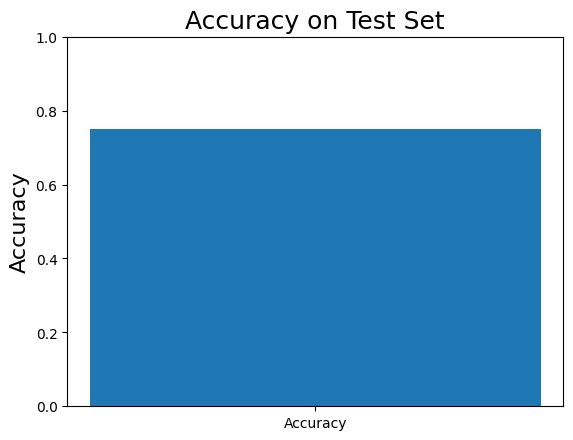

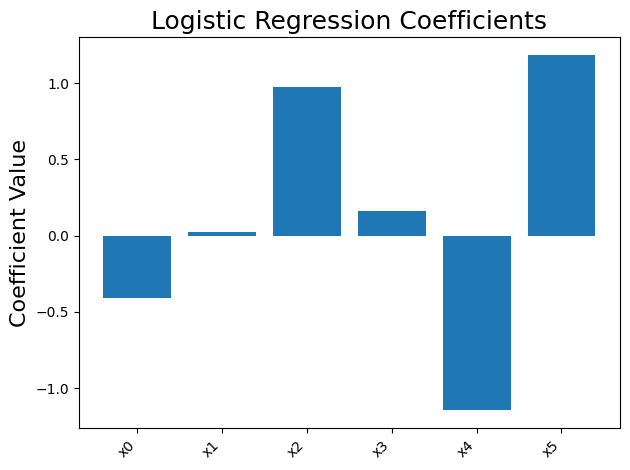

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

data = pd.read_csv('email.csv')

X_train, X_test, y_train, y_test = train_test_split(data.drop('class', axis=1), data['class'], test_size=0.2, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)

print("Learned Parameters: ")
print("Coefficients: ", clf.coef_)
print("Intercept: ", clf.intercept_)

# Evaluate accuracy on the test set using Scikit-Learn function
accuracy = clf.score(X_test, y_test)
print("Accuracy on Test Set: ", accuracy)


plt.bar(['Accuracy'], [accuracy])
plt.title('Accuracy on Test Set', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([0.0, 1.0])
plt.show()


plt.bar(data.columns[:-1], clf.coef_[0])
plt.title('Logistic Regression Coefficients', fontsize=18)
plt.ylabel('Coefficient Value', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Q3. Also use logistic regression model to predict the risk of having heart disease using the given dataset (heart.csv).

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Accuracy: 0.7951219512195122


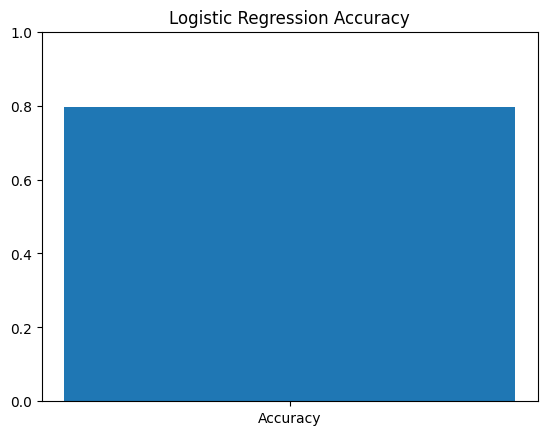

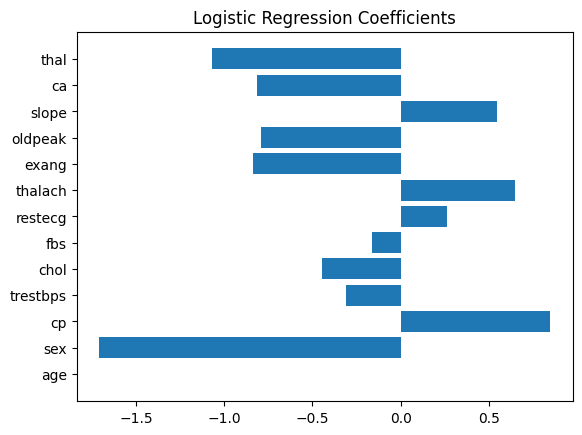

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('heart.csv')

print(data.isnull().sum())

X = data.drop(['target'], axis=1)
y = data['target']


scaler = StandardScaler()
X[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.fit_transform(X[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the logistic regression model
lr_model = LogisticRegression(random_state=42)

lr_model.fit(X_train, y_train)

# evaluate the model on the testing set
accuracy = lr_model.score(X_test, y_test)
print('Accuracy:', accuracy)

import matplotlib.pyplot as plt


accuracy = lr_model.score(X_test, y_test)

# plot the accuracy
plt.bar(['Accuracy'], [accuracy])
plt.ylim(0, 1)  # set the y-axis limits to 0 and 1
plt.title('Logistic Regression Accuracy')
plt.show()


# coefficients of the logistic regression model
coef = lr_model.coef_[0]

features = list(X.columns)

plt.barh(features, coef)
plt.title('Logistic Regression Coefficients')
plt.show()